#### **Interpret your models.**

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

#### **Abstract**
Customer churn has become a major problem in banking industry and banks have always tried to track customer interaction with the company to detect early warning signs in customer’s behavior.In this notebook we perform classification on whether a customer would be exit or not based on some factors and patterns.

#### **Importing and Cleaning the Dataset**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Required Libraries
import pandas as pd
#linear algebra
import numpy as np 
import math
import missingno as msno

#data tools
from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
import eli5
from eli5.sklearn import PermutationImportance

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Shap
import shap

#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline

In [ ]:
# reading a dataframe using pandas
df = pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **Variable Description**
* `customer_id` - Account Number of customer to identify a particular customer.

* `credit_score` - credit score of the customer to determine the creditworthiness of a customer.

* `country` - country of residence of customer.

* `gender` - sex of the customer

* `age` - age of the customer

* `tenure` - from how many years he/she is having bank acc in ABC Bank

* `balance` - Amount of money present in customer's bank account

* `products_number` - Number of product from bank

* `credit_card` - if the customer has credit card? 0 -if no and 1 - if yes , is a categorical value.

* `active_member` - if he/she is active member of bank ? , is a categorical value.

* `estimated_salary` - Total Income of the Customer.

* `churn` - Churn (Loss of existing customers) of the Bank is a categorical value


#### **Missing Values**

In [ ]:
#checking if the any data is missing
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: >

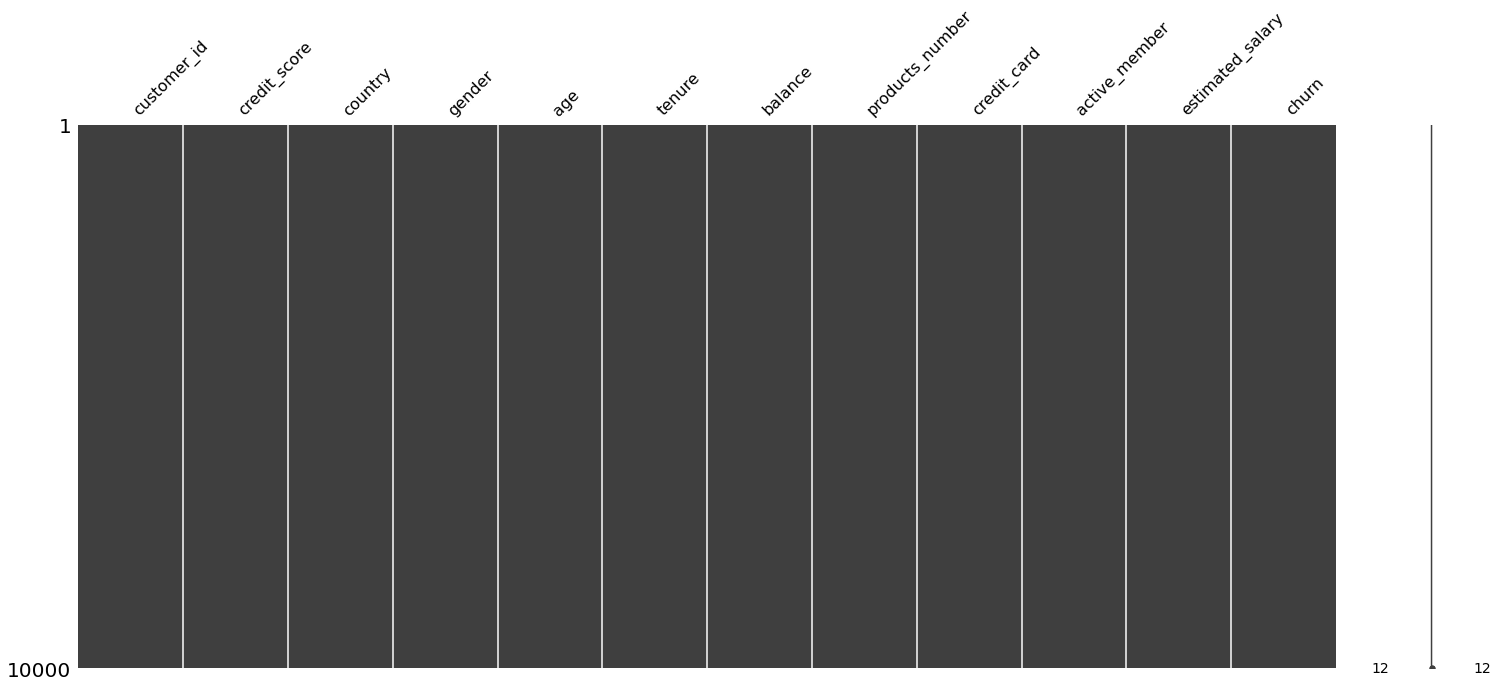

In [ ]:
msno.matrix(df)

It can be observed that there are no missing records.

In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### **Observations so far:**
* `credit_score` has a mean of 650 and 75% of data is distributed between 652 and 850, seems like a good distribution and may not have outliers.
* `age` has a mean of 38.9 years and maximum data is distributed between 37 years to 45 years, but the maximum value is 92 years which might be slightly right skewed from mean and it looks like investigation is needed to understand outliers and it will be discussed further in this notebook.
* `tenure` has a mean 5 and median is 5 and seems like a normal distribution may not have outliers.
* `balance` has mean 76485.889288 , maximum value is 250898.090000, minimum value is 0 and which is slightly left skewed from mean.
* `estimated_balance` has mean 100090.239881 and a median(2nd quantile) of 100193.915000 which is almost a normal distribution.

#### **Dropping feature**  
There is one feature which is can be dropped to improve the accuracy of our predictions. The feature is :

`Customer ID` - Customer ID is randomly allocated to a customer and does not depend on anything.

In [ ]:
df = df.drop(["customer_id"],axis = 1)

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dropping **customer_id** column as it is just a unique identifiers or number assigned to each customer.

In [ ]:
# This gives information about dataset like column data types, column labels, number of columns, 
# number of cell in each column which are not null, range index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### **Converting Categorical values to Numerical values**

In [ ]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Here we can observe that there are only 3 unique values in country which are 'France', 'Spain', 'Germany' and will. be converted to numerical values.

In [ ]:
#converting the categorical values of gender and country to numerical values
#df = pd.get_dummies(df, prefix='Is', drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    # Fit the label encoder to the dataframe column
    le.fit(df[column])
    # Replace the dataframe column with the encoded values
    df[column] = le.transform(df[column])

print(df)

      credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0  

In [ ]:
df['country'].unique()

array([0, 2, 1])

Here the categorical features like country where France is denoted by 0 , Germany by 1 & spain by 2 and gender in our dataset is converted to numerical value using the Label Encoder function to build the model which is more accurate.

In [ ]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [ ]:
target = df["churn"]

In [ ]:
target.shape

(10000,)

Storing the target feature into target dataframe and it is observed that there are 10,000 records.

In [ ]:
features = df[["credit_score","country","gender","age","tenure","balance","products_number","credit_card","active_member","estimated_salary"]]

In [ ]:
features.shape

(10000, 10)

In [ ]:
datasetClean = pd.concat([features,target], axis = 1, join = 'inner')

This code line combines two Pandas dataframes, features and target, into a single dataframe datasetClean.

The pd.concat() function is used to concatenate (combine) the dataframes. The first argument of pd.concat() is a list of dataframes to concatenate, which in this case is [features, target]. The second argument, axis, specifies the axis along which to concatenate. Here, axis=1 means to concatenate the dataframes horizontally (i.e., adding columns).

The third argument, join, specifies the type of join to use. 'inner' means to perform an inner join, which will only include rows that have matching values in both dataframes.

Overall, this code line creates a new dataframe datasetClean that includes all the columns from features and target, but only includes rows where there is a match on the churn column (which is the target variable in this case).

In [ ]:
datasetClean.shape

(10000, 11)

In [ ]:
df = df.reset_index()

So, after executing df = df.reset_index(), the DataFrame df will have a new index, starting from 0, that is sequential and without any missing values. This can be useful for indexing or joining with other DataFrames, or for restoring the original order of the DataFrame if the order was lost during some operations like sorting, filtering or removing rows.

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

So, after executing df.replace([np.inf, -np.inf], np.nan, inplace=True), any infinite values in the DataFrame df will be replaced with NaN and the changes will be made to the original DataFrame df.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [ ]:
X_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,295,0,1,14,6,0,1,1,1,8963
1561,241,1,1,24,4,3167,1,1,1,9782
1670,168,2,1,6,3,2762,0,1,0,4291
6087,170,0,0,9,9,4516,0,1,0,7686
6669,126,0,1,38,9,4968,0,0,0,1936


In [ ]:
y_train.shape

(8000,)

train test has 80% i.e 8000 records here.

#### **1. Fit a linear model and interpret the regression coefficients**

**Linear Model**



In [ ]:
import statsmodels.api as sm

lin_reg = sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  churn   R-squared (uncentered):                   0.309
Model:                            OLS   Adj. R-squared (uncentered):              0.308
Method:                 Least Squares   F-statistic:                              357.9
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        01:25:31   Log-Likelihood:                         -3541.8
No. Observations:                8000   AIC:                                      7104.
Df Residuals:                    7990   BIC:                                      7174.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
credit_score      -4.29e-06   3.71e-05     -0.116      0.908   -7.69e-05    6.84e-05
country              0.0184      0.005      3.651      0.000       0.009       0.028
gender              -0.0711      0.008     -8.606      0.000      -0.087      -0.055
age                  0.0119      0.000     32.019      0.000       0.011       0.013
tenure            -4.27e-05      0.001     -0.031      0.975      -0.003       0.003
balance           1.721e-05   1.99e-06      8.644      0.000    1.33e-05    2.11e-05
products_number     -0.0080      0.007     -1.092      0.275      -0.022       0.006
credit_card          0.0098      0.009      1.117      0.264      -0.007       0.027
active_member       -0.1389      0.008    -16.602      0.000      -0.155      -0.123
estimated_salary  2.945e-06   1.37e-06      2.146      0.032    2.55e-07    5.64e-06
==============================================================================
Omnibus:                     1184.597   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1799.316
Skew:                           1.159   Prob(JB):                         0.00
Kurtosis:                       3.159   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **Pointes to be noted:**
Considering the significance value of 0.05 according to the rule of thumb in statistics.

* `credit_score` has the p-value 0.908, which is lesser and hence it is a **non-significant** feature.
* `country` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `gender` has the p-value 0, which is lesser and hence it is a **significant** feature.
*  `age` has the p-value 0, which is lesser and hence it is a **significant** feature.
*  `tenure` has the p-value 0.957, which is which is slightly more than the threshold value of 0.05 and hence it is a **non-significant** feature.
* `balance` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `products_number` has the p-value 0.275, which is lesser and hence it is a **non-significant** feature.
* `credit_card` has the p-value 0.547, which is greater than the significant value i.e 0.05 and hence it is a **non-significant** feature.
* `active_member` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `estimated_salary` has the p-value 0.032, which is greater and hence it is a **significant** feature.

#### **Permutation Importance : Let's calculate Feature weights using Permutation Importance.**

In [ ]:
def get_permutation_importance(df):
    X = df[["credit_score","gender","country","age","tenure","balance","products_number","credit_card","active_member","estimated_salary"]]
    y = df[["churn"]]
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    # Create linear regression object
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    pi = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    return eli5.show_weights(pi, feature_names = X_test.columns.tolist())
    

In [ ]:

get_permutation_importance(df)

Weight,Feature
0.1789 ± 0.0159,age
0.0598 ± 0.0084,active_member
0.0198 ± 0.0070,gender
0.0154 ± 0.0072,balance
0.0014 ± 0.0004,credit_score
0.0010 ± 0.0025,country
0.0008 ± 0.0005,products_number
0.0007 ± 0.0008,tenure
0.0002 ± 0.0009,estimated_salary
-0.0006 ± 0.0006,credit_card


#### **Observation**:
`age` is the most important feature to predict the target variable `churn` followed by `active_member`, `gender` and `balance`.

In [ ]:
#Predicting the values
lr_pred = lin_reg.predict(X_test)


In [ ]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 0.283642
RMSE: 0.369368
R2 0.135887


#### **Interpretation of model coefficients:**
- Prob(F- Statistic) = 0.00 indicates that our model is satatistically significant an all significace levels.
- R squared value of 0.309 indicate that 30.9% of the data is explained/fit by the model.
- P > |t| has a value less than 0.1 for `country`,`gender`,`age`,`balance`,`active_member`,`estimated_salary` indicating that these variables are important in predicting the price.


#### **2. Fit a tree-based model and interpret the nodes**

**Tree based Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)


0.25323036635378915


The code creates an instance of the DecisionTreeRegressor class named DTree. The max_depth parameter is set to 3, which limits the maximum depth of the decision tree to 3 levels. This helps prevent overfitting, which is when the model performs well on the training data but poorly on new, unseen data. The random_state parameter is set to 1234, which ensures that the results are reproducible.

Then, the fit() method is called on DTree to train the decision tree model using the training data X_train and y_train. X_train contains the input features (also called independent variables or predictors) for the training data, while y_train contains the corresponding target values (also called dependent variable or response variable).

After training the model, the code uses the score() method to evaluate the performance of the model on the test data. The score() method returns the coefficient of determination R^2 of the prediction, which is a measure of how well the model fits the test data. The higher the R^2 value, the better the model's performance.

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

This code defines a function model_sel that takes a machine learning model as input, predicts the target values on a test dataset using the input model and prints the R-squared score as the model evaluation result. The R-squared score measures how well the model fits the data, with higher values indicating a better fit.

In [ ]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-------------------------
MODEL EVALUATION

r2_score of the model: 
0.25323036635378915


In [ ]:
prediction_tree = DTree.predict(X_test)

In [ ]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.239311
RMSE: 0.343374
R2 0.253230


The code below uses the plot_tree function from the sklearn.tree module to create a graphical representation of a decision tree model (DTree). The feature_names argument specifies the names of the features used in the model, and the filled argument indicates whether to color the nodes to indicate their impurity.

The resulting plot shows the decision tree with the root node at the top and subsequent nodes branching out below. Each node represents a decision based on a particular feature, with the branch to the left indicating the outcome when the feature meets the decision criterion and the branch to the right indicating the outcome when it does not.

The plot includes the squared_error and samples values for each node, as well as the value for the leaf nodes, which represents the predicted target value for that group of samples.

[Text(0.5, 0.875, 'age <= 26.5\nsquared_error = 0.163\nsamples = 8000\nvalue = 0.206'),
 Text(0.25, 0.625, 'products_number <= 1.5\nsquared_error = 0.114\nsamples = 6130\nvalue = 0.131'),
 Text(0.125, 0.375, 'products_number <= 0.5\nsquared_error = 0.102\nsamples = 5987\nvalue = 0.115'),
 Text(0.0625, 0.125, 'squared_error = 0.15\nsamples = 2952\nvalue = 0.184'),
 Text(0.1875, 0.125, 'squared_error = 0.047\nsamples = 3035\nvalue = 0.049'),
 Text(0.375, 0.375, 'balance <= 148.0\nsquared_error = 0.157\nsamples = 143\nvalue = 0.804'),
 Text(0.3125, 0.125, 'squared_error = 0.239\nsamples = 56\nvalue = 0.607'),
 Text(0.4375, 0.125, 'squared_error = 0.064\nsamples = 87\nvalue = 0.931'),
 Text(0.75, 0.625, 'active_member <= 0.5\nsquared_error = 0.247\nsamples = 1870\nvalue = 0.448'),
 Text(0.625, 0.375, 'age <= 33.5\nsquared_error = 0.22\nsamples = 804\nvalue = 0.673'),
 Text(0.5625, 0.125, 'squared_error = 0.248\nsamples = 502\nvalue = 0.55'),
 Text(0.6875, 0.125, 'squared_error = 0.108\nsam

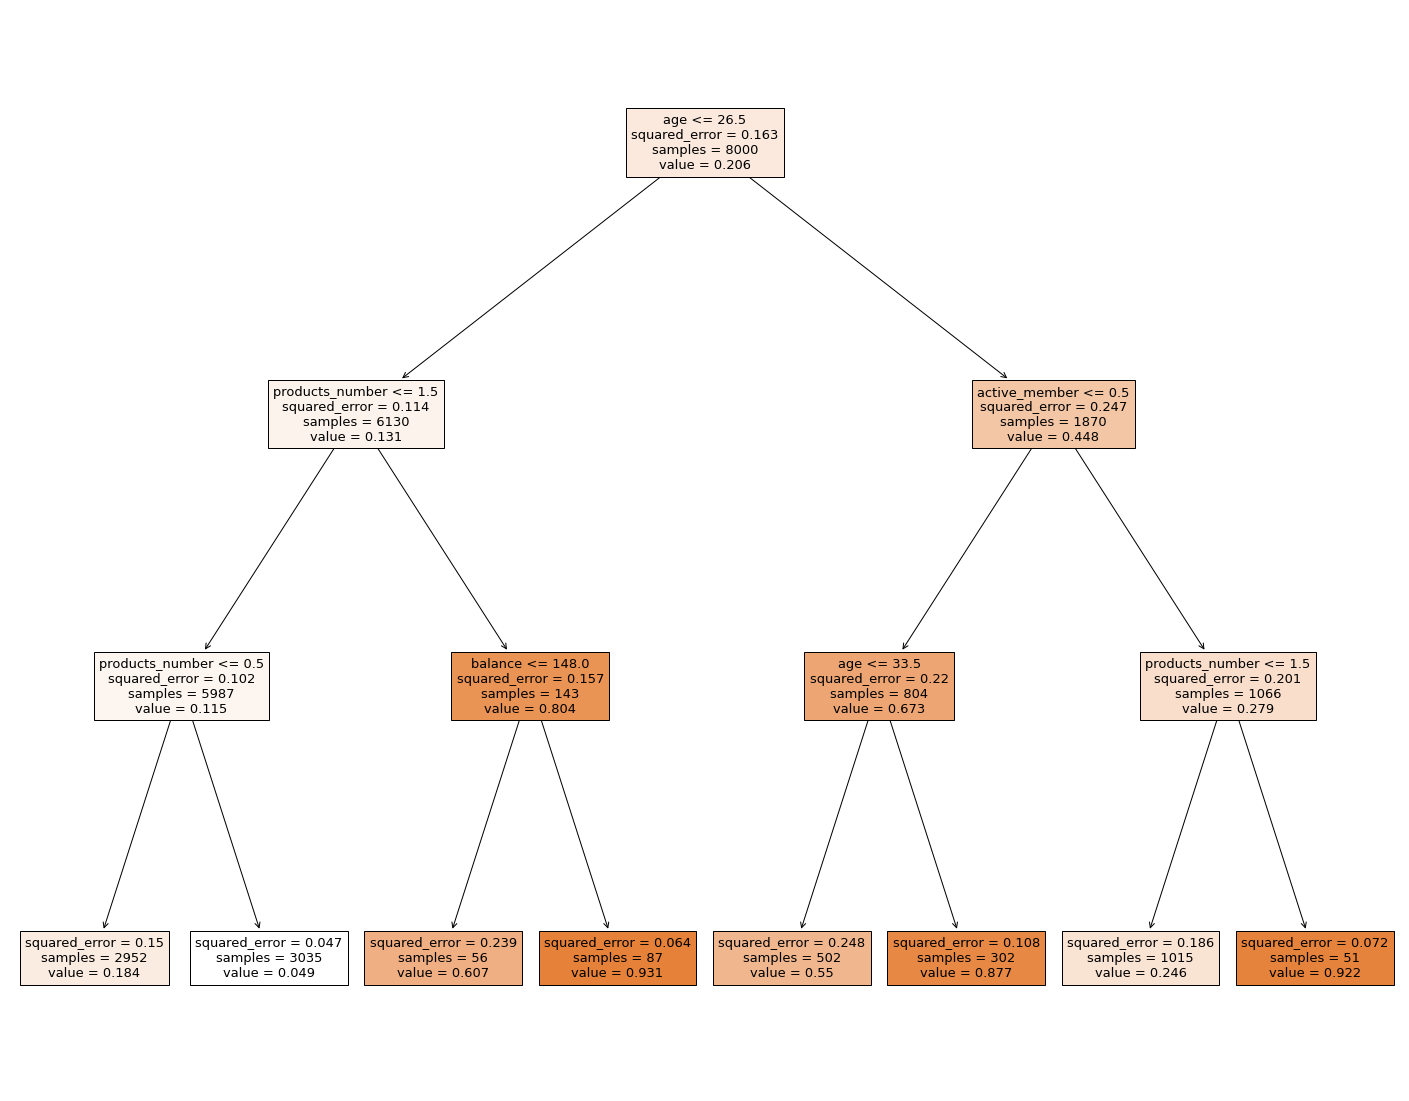

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

The max_depth of the tree is set at 3. With each note, the data is being split into smaller subset. Node 0 has all samples of the dataset, but it'll be lower by the Node 3. Node 0 - age - took 8000 samples to arrive at value of 0.26. Node 2 and Node 3 - products_number,  active_member - took 6130 and 1870 samples to set a bracket for products_number, balance and age and further the leaves of the tree has a bracket for mse, wherein each mse bracket is given a value.

#### **3. Use auto ml to find the best model**

#### **AutoML**

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,21 mins 01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_fqn73b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.159 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
df_autom = h2o.import_file('https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# displaying top 5 rows of dataset
df_autom.head(5)

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1.56346e+07,619,France,Female,42,2,0,1,1,1,101349,1
1.56473e+07,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
1.56193e+07,502,France,Female,42,8,159661,3,1,0,113932,1
1.57014e+07,699,France,Female,39,1,0,2,0,0,93826.6,0
1.57379e+07,850,Spain,Female,43,2,125511,1,1,1,79084.1,0


####**Splitting train test and vailidation into 70:15:15 ratio**

In [ ]:
train,test,valid = df_autom.split_frame(ratios=[.7, .15])

In [ ]:
y = "churn"
x = df_autom.columns
x.remove(y)
x.remove("customer_id")

- Here the target feature is churn for binary classification.
- Removing customer_id as customer id is just unique identifier that is randomly allocated to a customer and dont contribute for the analysis

#### **Initializes an H2O AutoML object.**
The command below initializes an H2O AutoML object with specific settings to limit the number of models built, exclude certain algorithms, and control the verbosity and cross-validation settings.

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
01:25:46.160: Project: AutoML_2_20230321_12546
01:25:46.160: Cross-validation disabled by user: no fold column nor nfolds > 1.
01:25:46.161: Setting stopping tolerance adaptively based on the training frame: 0.011935247900657215
01:25:46.161: Build control seed: 10
01:25:46.161: training frame: Frame key: AutoML_2_20230321_12546_training_py_14_sid_817d    cols: 12    rows: 7020  chunks: 8    size: 152460  checksum: -7352140817740871948
01:25:46.161: validation frame: Frame key: py_16_sid_817d    cols: 12    rows: 1466  chunks: 8    size: 49704  checksum: 3900511394407420858
01:25:46.161: leaderboard frame: Frame key: py_16_sid_817d    cols: 12    rows: 1466  chunks: 8    size: 49704  checksum: 3900511394407420858
01:25:46.161: blending frame: NULL
01:25:46.161: response column: churn
01:25:46.161: fold column: null
01:25:46.161: weights column: null
01:25:46.162: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,45.0,45.0,34309.0,7.0,7.0,7.0,24.0,105.0,56.02222
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-03-21 01:25:55,0.010 sec,0.0,0.4037953,0.3261012,0.1630506,0.3979155,0.3213873,0.1583367
,2023-03-21 01:25:56,0.110 sec,5.0,0.3471874,0.2742830,0.1205391,0.3509475,0.2771474,0.1231641
,2023-03-21 01:25:56,0.239 sec,10.0,0.3207138,0.2428149,0.1028573,0.3324516,0.2516477,0.1105241
,2023-03-21 01:25:56,0.360 sec,15.0,0.3063496,0.2223553,0.0938501,0.3235031,0.2357826,0.1046543
,2023-03-21 01:25:56,0.487 sec,20.0,0.2972834,0.2067614,0.0883774,0.3185621,0.2234760,0.1014818
,2023-03-21 01:25:56,0.654 sec,25.0,0.2918034,0.1970149,0.0851492,0.3167569,0.2168675,0.1003349
,2023-03-21 01:25:56,0.799 sec,30.0,0.2882148,0.1902463,0.0830678,0.3162189,0.2123291,0.0999944
,2023-03-21 01:25:56,0.934 sec,35.0,0.2854634,0.1863591,0.0814894,0.3158061,0.2101554,0.0997335


####**Points Learnt:**
- Passing the input features `x` , output column `y` which is churn and training dataframe `train` and valiation dataframe `valid` as input to the train function. 
- Whenever it creates new model it updates the new leader like for `XGBoost` , `GLM`, `GBM` Gradient Boosting Model, Distributed Random Forest `DRF` and all the other models

#### **Training the AutoML with training data** 
below, gives the leaderboard which has performance of models after training

In [ ]:
lb = aml.leaderboard

In [ ]:
best_model = aml.get_best_model()

In [ ]:
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_2_20230321_12546


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    45                 45                          34309                  7            7            7             24            105           56.0222

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.07904578671073677
RMSE: 0.28115082555585136
MAE: 0.18100322239827535
RMSLE: 0.19595380874333104
Mean Residual Deviance: 0.07904578671073677

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.09981496986009794
RMSE: 0.31593507222228107
MAE: 0.20807261123966872
RMSLE: 0.22265686308767835
Mean Residual Deviance: 0.099814969

#### **Observations on best model:**
- **Gradient Boosting Machine** is the best performing model with model key *GBM_3_AutoML_12_20230227_23505*
- `age` has the highest relative_importance with respect to the target feature `churn` and followed by `product_number`
- **AUC** (Area under ROC curve )threshold is **0.95** for train data and **0.84** for validata data. 

In [ ]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_2_AutoML_2_20230321_12546,0.315935,0.099815,0.208073,0.222657,0.099815
GBM_1_AutoML_2_20230321_12546,0.318701,0.10157,0.211805,0.224794,0.10157
GBM_3_AutoML_2_20230321_12546,0.318738,0.101594,0.2095,0.225179,0.101594
XGBoost_3_AutoML_2_20230321_12546,0.31996,0.102374,0.210731,0.226239,0.102374
GBM_4_AutoML_2_20230321_12546,0.321454,0.103333,0.210828,0.227941,0.103333
DRF_1_AutoML_2_20230321_12546,0.322904,0.104267,0.212315,0.22982,0.104267
XRT_1_AutoML_2_20230321_12546,0.33597,0.112876,0.246238,0.240971,0.112876
XGBoost_2_AutoML_2_20230321_12546,0.345683,0.119497,0.231607,0.249354,0.119497
XGBoost_1_AutoML_2_20230321_12546,0.356157,0.126848,0.246918,0.258671,0.126848
GLM_1_AutoML_2_20230321_12546,0.367135,0.134788,0.284609,0.260094,0.134788


#### **Gradient Boosting Machine is the best model.**

#### **4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.**

#### **Shap Analysis**

The technique called SHAP (SHapley Additive exPlanations), created by Lundberg and Lee in 2017, is used to clarify specific predictions. It relies on the most efficient Shapley values from game theory to do this. SHAP's objective is to determine how each feature adds to the prediction of an instance x. By using coalitional game theory, the SHAP explanation method calculates Shapley values.

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

#### **1. Shap Analysis of the Linear Model**

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


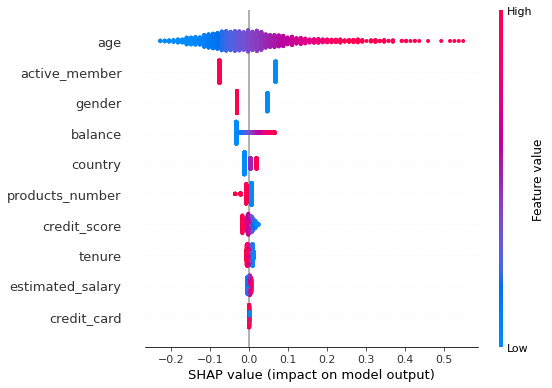

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_perturbation='interventional',feature_names=features.columns)
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

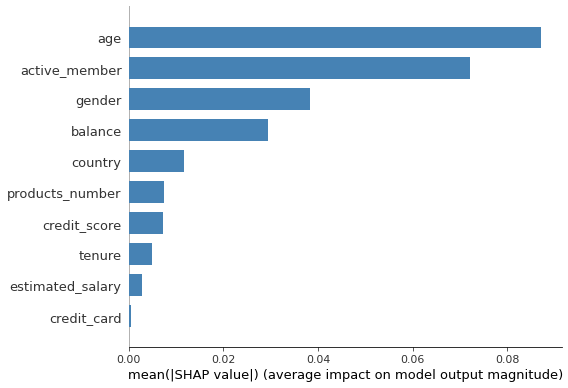

In [ ]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

#### **Observations**

- The `age` and `active_member` variable shows high importance than other features in predicting the `churn` feature


#### **2. Tree Model - Shap Analysis**

In [ ]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

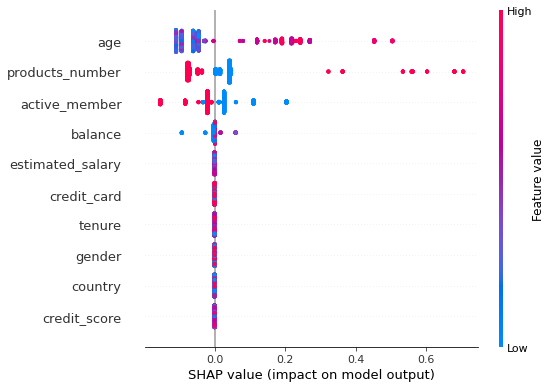

In [ ]:
shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

The tree model suggests that `age` and `product_number` is more signifiacnt where in linear regression, `age` and `active_member` were the most significant features.

#### **3. AutoML - Shap Analysis**
AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

exm = aml.explain(datasetAutoMLTest)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_3_AutoML_2_20230321_12546,0.322273,0.10386,0.206213,0.225582,0.10386,1066,0.012246,GBM
GBM_2_AutoML_2_20230321_12546,0.322629,0.10409,0.208225,0.225495,0.10409,1199,0.028934,GBM
XGBoost_3_AutoML_2_20230321_12546,0.325018,0.105637,0.210165,0.228284,0.105637,765,0.002064,XGBoost
GBM_4_AutoML_2_20230321_12546,0.327461,0.107231,0.212024,0.229712,0.107231,1249,0.012282,GBM
GBM_1_AutoML_2_20230321_12546,0.327572,0.107304,0.215785,0.229734,0.107304,1922,0.013617,GBM
DRF_1_AutoML_2_20230321_12546,0.329769,0.108748,0.21239,0.232,0.108748,3488,0.020235,DRF
XRT_1_AutoML_2_20230321_12546,0.338898,0.114852,0.246134,0.24208,0.114852,4838,0.017283,DRF
XGBoost_2_AutoML_2_20230321_12546,0.353864,0.12522,0.235049,0.252488,0.12522,1329,0.003766,XGBoost
XGBoost_1_AutoML_2_20230321_12546,0.353971,0.125295,0.244132,0.256704,0.125295,2236,0.005097,XGBoost
GLM_1_AutoML_2_20230321_12546,0.372422,0.138698,0.284995,0.261973,0.138698,691,0.001546,GLM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

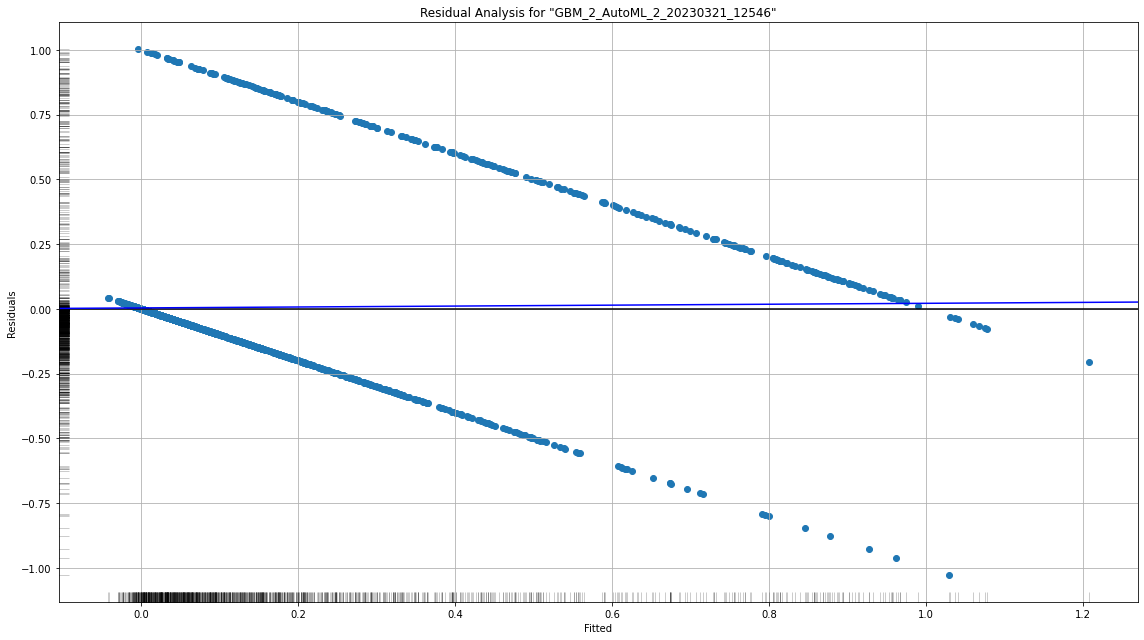

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

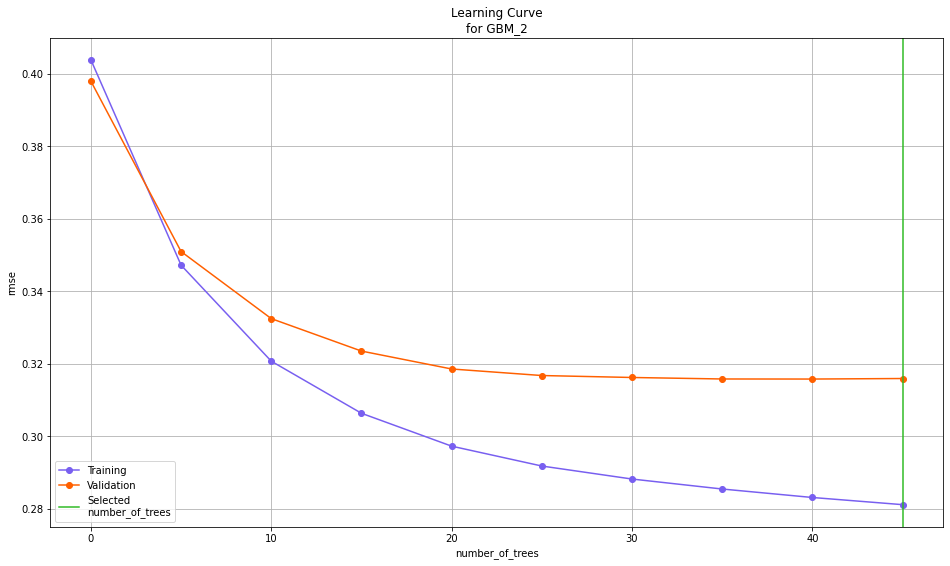

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

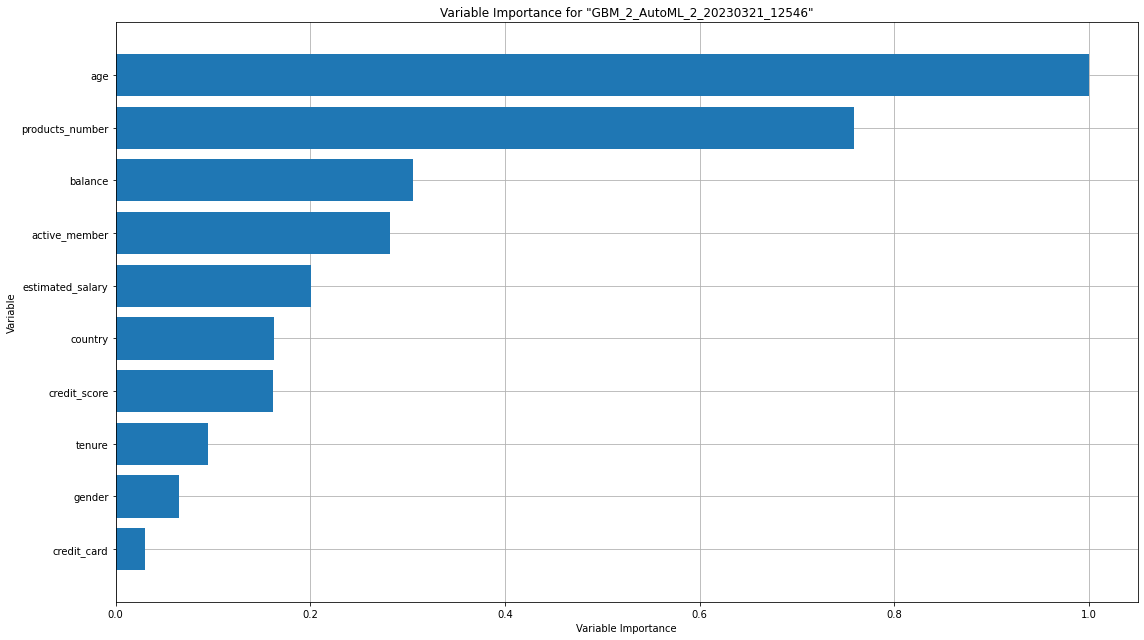

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

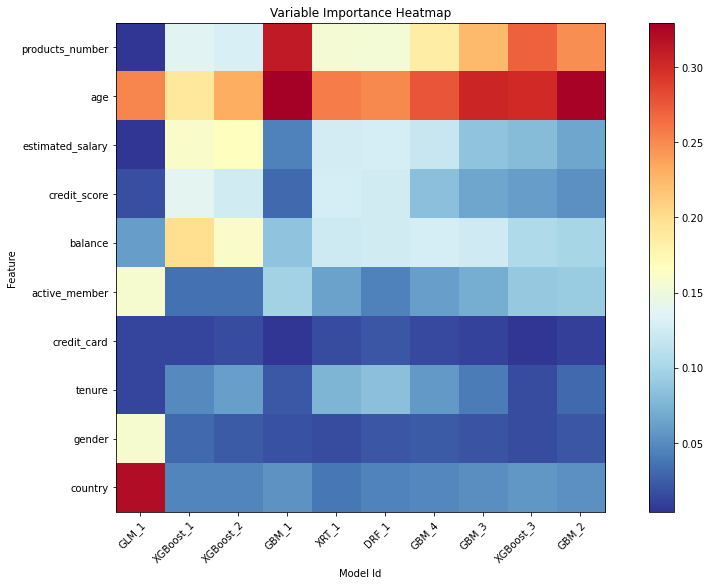

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

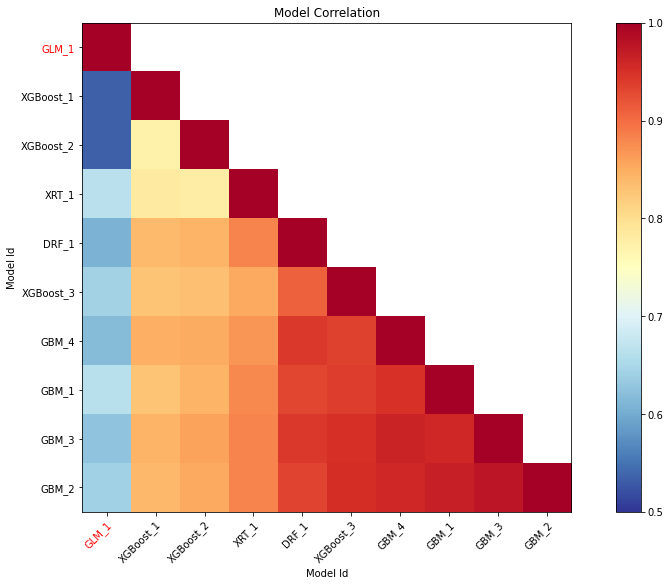

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

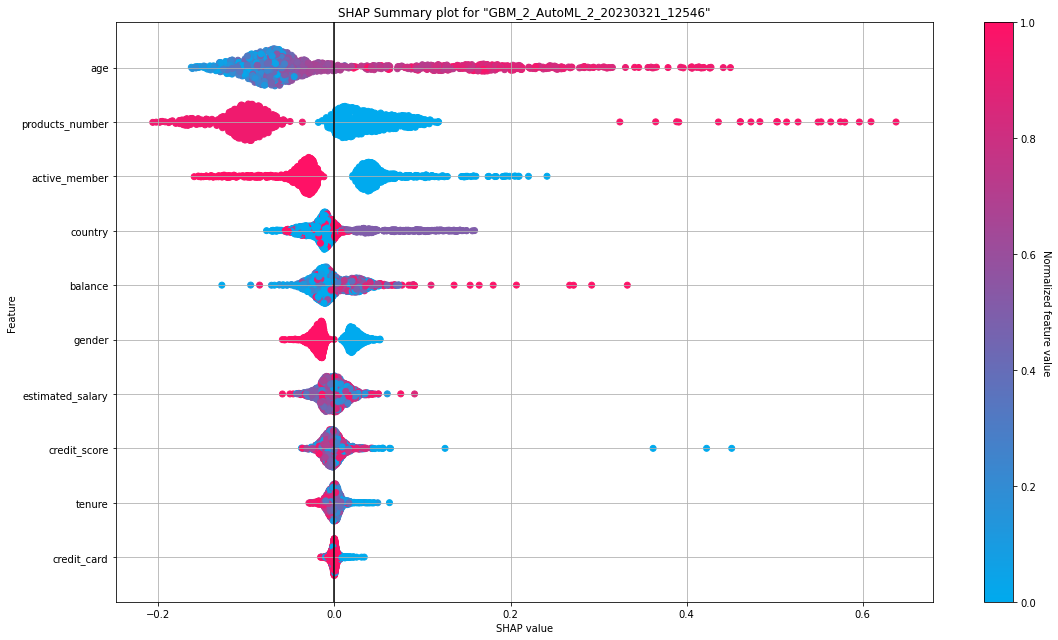

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

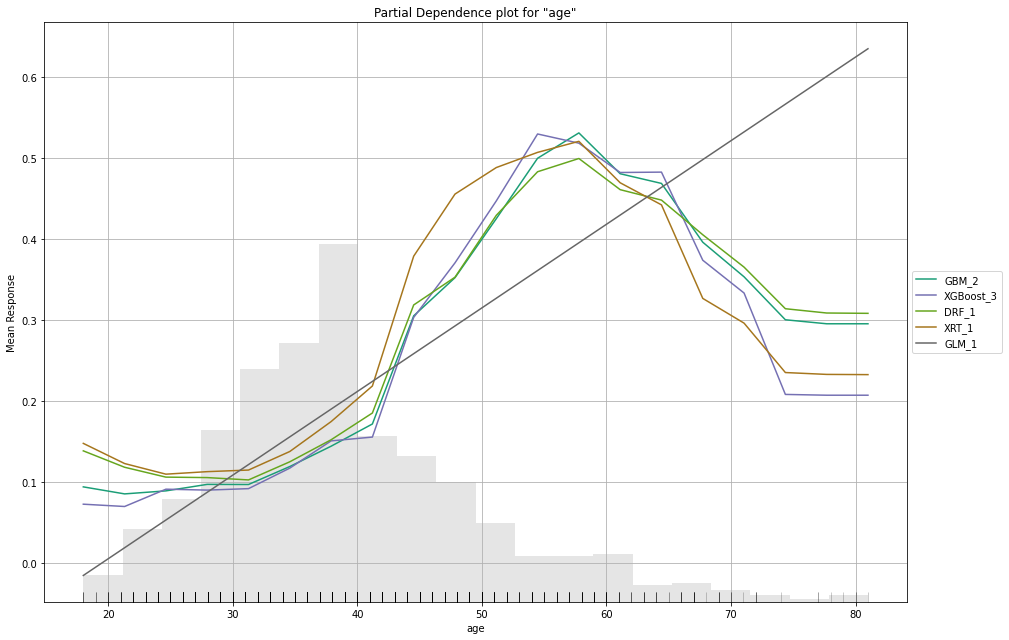

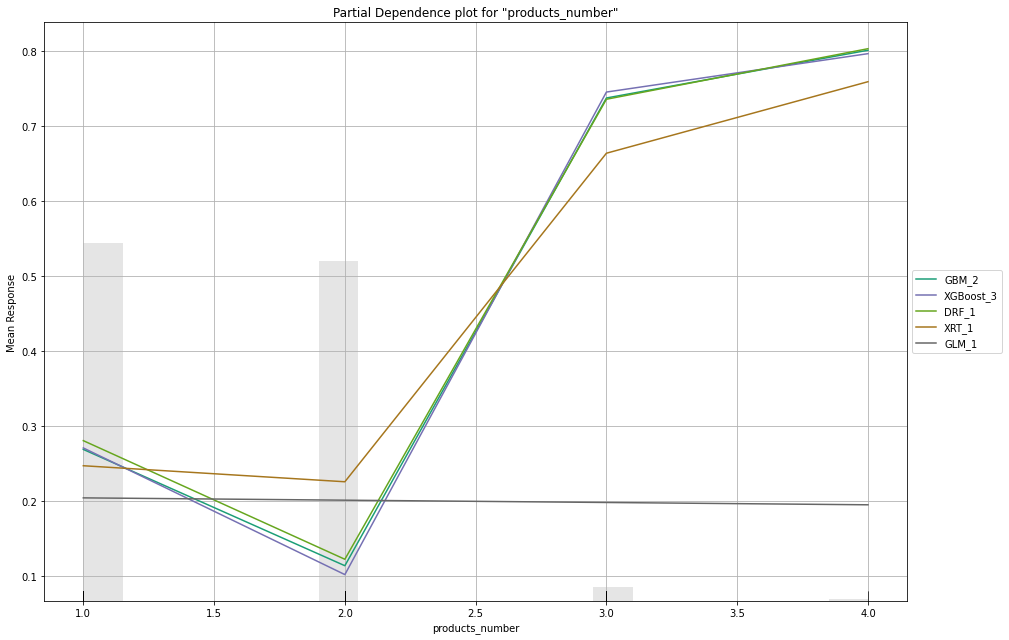

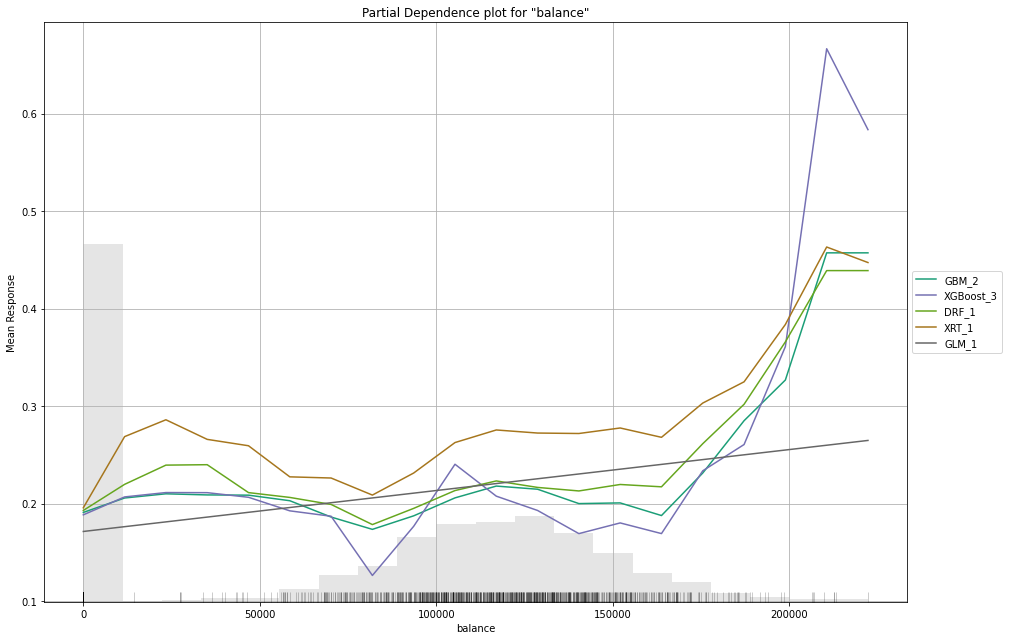

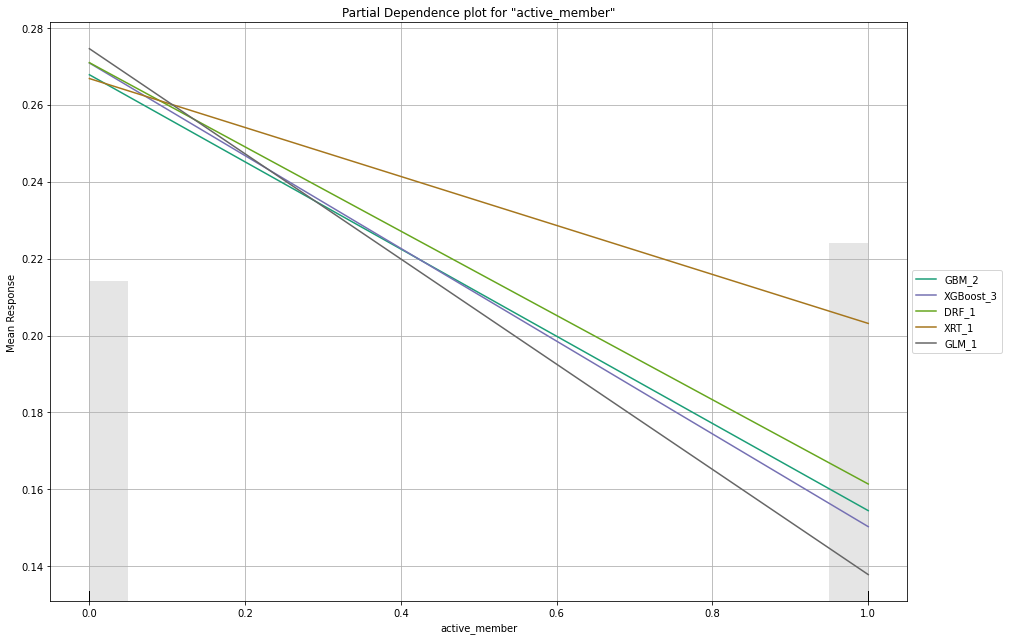

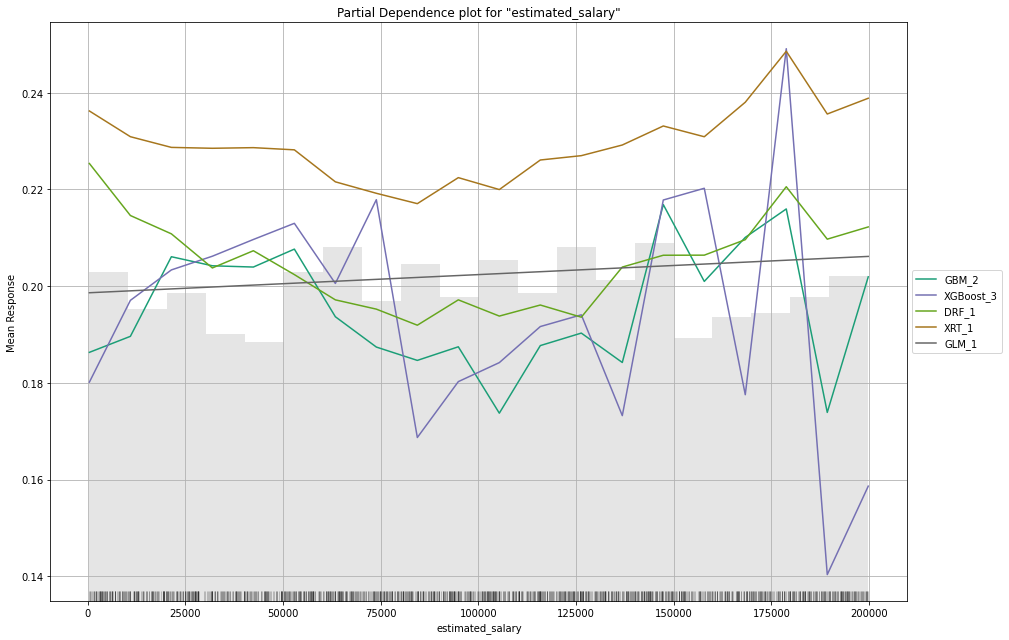

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

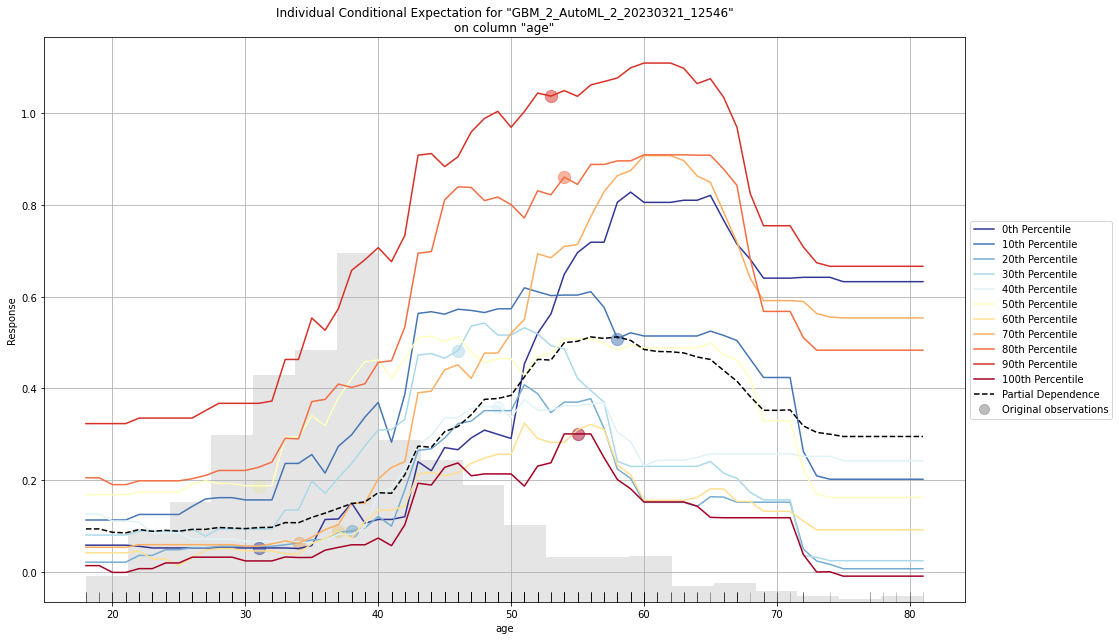

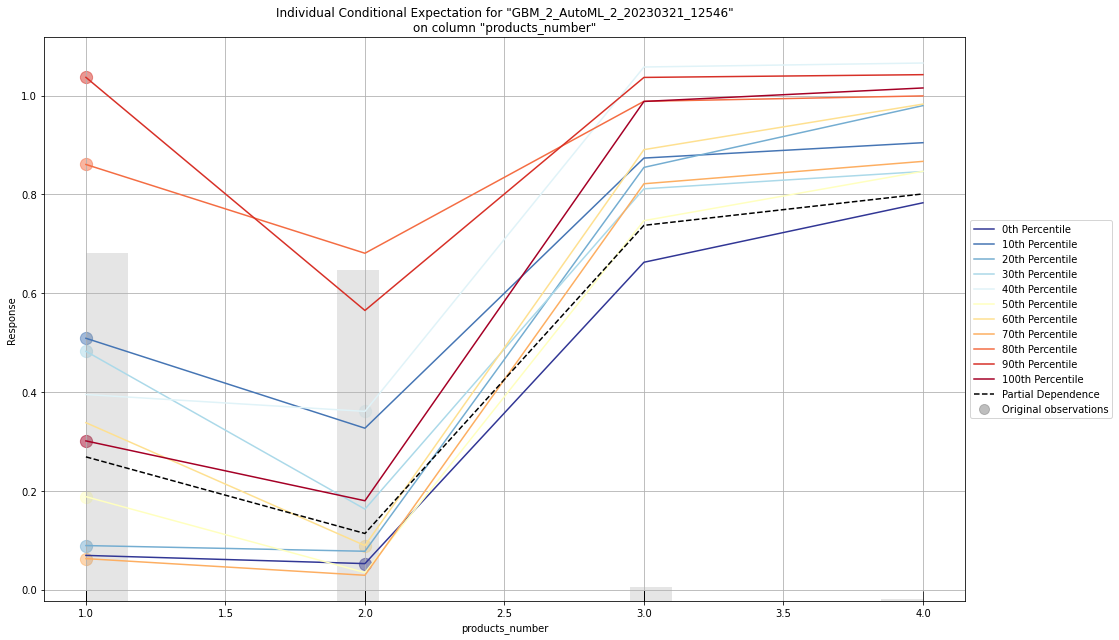

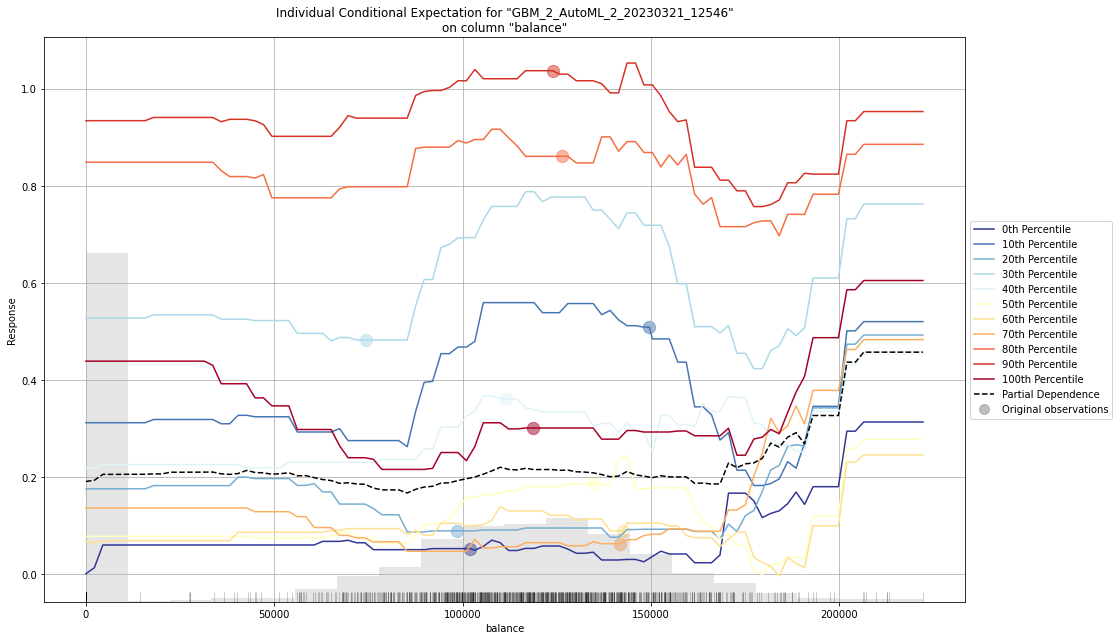

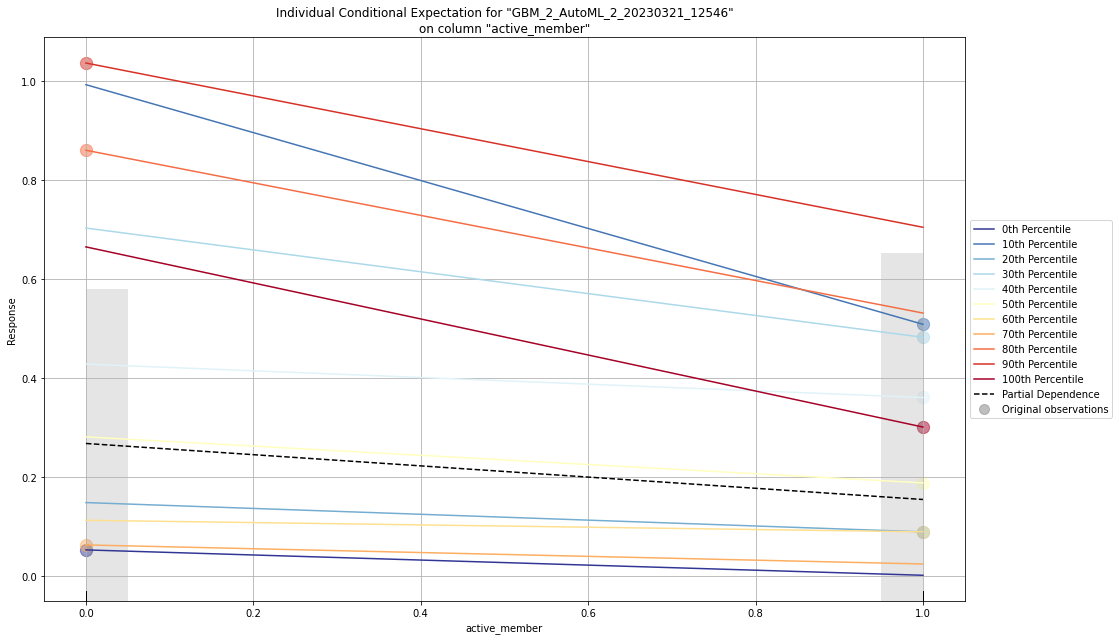

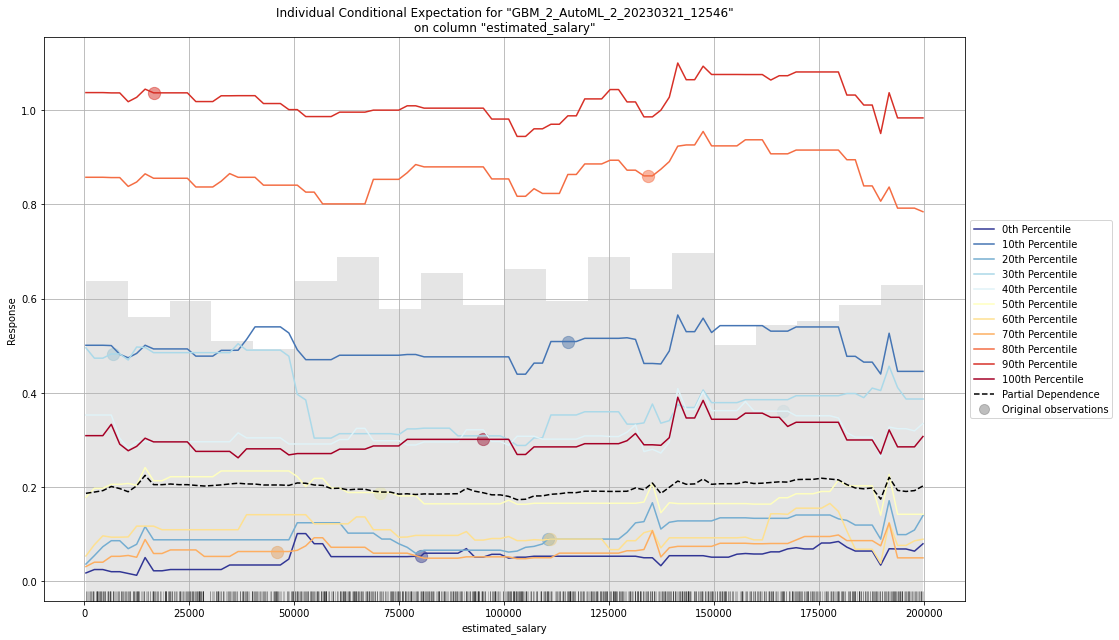

In [ ]:
exm = aml.explain(test)

###**Observations**:

##### **From Variable importance graph**

- `age` shows high importance in predicting the target varible `churn`. Its very high showing colinearity
- `credit_card` of a machine has no much importance in predicting target i.e `churn`

##### **From Shap Analysis**

- Expect `age` and `product_number` other features doesn't show high variation in the impact on target variable



###**Conclusion**

* In Linear model, SHAP abalysis shows similar inference like the feature importance approaches like OLS regression
* In a treebased model the inferences from feature importance and SHAP are almost same how ever they are a bit different on same traget variable comparing to linear modeling
* SHAP helps us in understanding the importance of a feature in a row level and fairly showing the population density at that instant
* for `churn` variable different models showed different impact on the same target 
* In a tree based model `age` and `product_number` showed high importance on `churn` while other models showed `active_member` as an important feature over every other



### References:

1. H2O.ai documentation https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
2. H2O.ai notebook reference on a different dataset for classification https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb#scrollTo=vOxeivTyUCeq
3. H2O.ai model explainability https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
4. permutation importance is refered from scikit-learn permutation handling concept document https://scikit-learn.org/stable/modules/permutation_importance.html
5. modeling is refered from scikit-learn logistic regression officiakl documentatio
6. Outlier Imputation is refered from sklearn "logistic-regression-using-python-and-excel" explanation
7. Refered Kaggle contributions for oversampling 
8. Outlier handling is referec from analytics vidhya outlier handling theoritical explanation https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
9. Shap Analysis is refered from https://www.analyticsvidhya.com/blog/2021/11/model-explainability/

All other code and function implementation are independently written.


###Copyright 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.